# Part 1: Load the data and create a datetime index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

In [2]:

url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv "
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


In [3]:
df['date'].sample(n=10).sort_index()

472      19800417
4151     19900514
6709     19970515
6980     19980210
7212     19980930
7227     19981015
8639     20020827
9487     20041222
11691    20110104
13726    20160731
Name: date, dtype: int64

### Convert the date column to datetime dtype

In [4]:
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Set the date column as the index.

In [6]:
df = df.set_index('date')

In [7]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth

In [8]:
ts_df=df.loc['2000':]

In [9]:
ts_df = ts_df.drop(columns=(['cloud_cover', 'sunshine', 'global_radiation','pressure']))
ts_df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


### Impute any missing values.
- Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [10]:
ts_df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [11]:
ts_df['snow_depth'] = ts_df['snow_depth'].ffill()

In [12]:
ts_df['max_temp'] = df['max_temp'].interpolate()
ts_df['mean_temp'] = df['mean_temp'].interpolate()
ts_df['min_temp'] = df['min_temp'].interpolate()

In [13]:
ts_df['precipitation'] = ts_df['precipitation'].bfill()

In [14]:
ts_df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [15]:
ts_df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

### For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
### Plot the feature that the question is asking about.
### If there is a specific time period, plot only that time period.
### Note: you may want to make a temporary DataFrame that you will use to answer this question only.

#### Q1: What month had the most precipitation between 2000 through 2010?

In [16]:
ts_df.head(2)

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0


In [22]:
ds = ts_df['precipitation'].copy()

In [23]:
##  set monthly frequency
ds = ds.asfreq('M')
##  preview the index again
ds.index


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=252, freq='M')

In [24]:
ds = ts_df['precipitation'].copy()
ds.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [25]:
max_date = ts_df['precipitation'].idxmax()
max_date

Timestamp('2015-08-25 00:00:00')

In [26]:
ts_df.loc[max_date]

max_temp         19.3
mean_temp        15.9
min_temp         13.3
precipitation    51.6
snow_depth        0.0
Name: 2015-08-25 00:00:00, dtype: float64

In [27]:
## Change the default figure size to something wider (12,5)
plt.rcParams['figure.figsize'] = (12,3)

In [28]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator
loc_major_yr = mdates.YearLocator()
# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

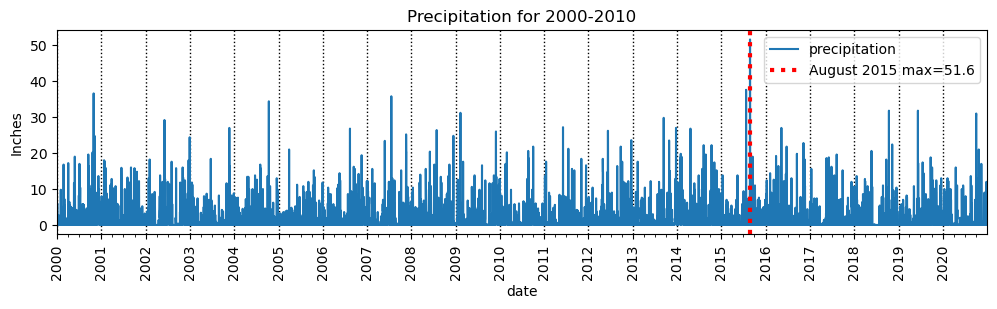

In [31]:
## Create our plot and save the ax
ax = ds.plot()
ax.set(ylabel="Inches", title='Precipitation for 2000-2010')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
#ax.xaxis.set_minor_formatter(fmt_minor_3m)
ax.axvline('2015-08-25', color='red',lw=3,ls=':',label='August 2015 max=51.6')




# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')
ax.legend();

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [68]:
ts_df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [69]:
ct_ts = ts_df['mean_temp'].copy()
ct_ts

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [70]:
ct_ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [71]:
##  set yearly frequency
ct_ts = ct_ts.asfreq('Y')
##  preview the index again
ct_ts.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

In [81]:
cool_temp = ts_df['mean_temp'].idxmin()
cool_temp

Timestamp('2010-12-20 00:00:00')

In [82]:
ts_df.loc[cool_temp]

max_temp         1.8
mean_temp       -4.1
min_temp        -9.4
precipitation    0.0
snow_depth       5.0
Name: 2010-12-20 00:00:00, dtype: float64

In [58]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator
loc_major_5yr = mdates.YearLocator()
# Create a year formatter using 4-digit years
fmt_major_5yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( year)
# Create a year locator that will add every year
loc_minor_1y = mdates.YearLocator()
# Createa year formatter that will use 4 digit year
#fmt_minor_1y = mdates.DateFormatter("%Y")

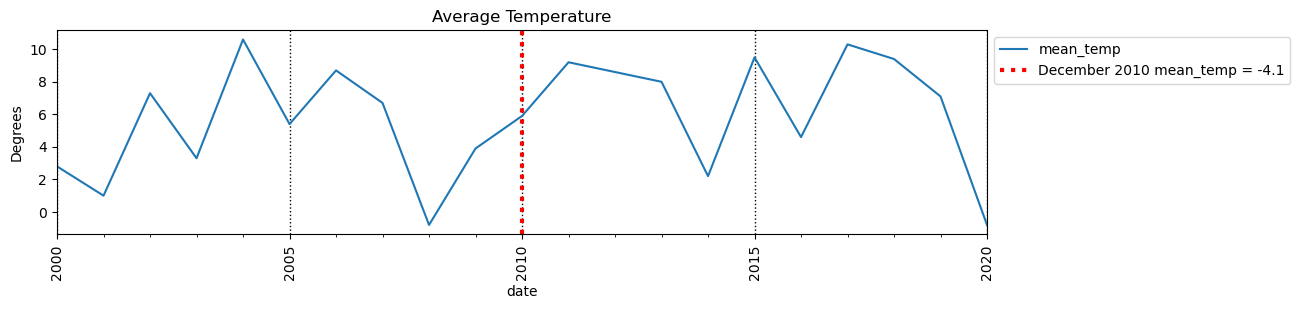

In [78]:
## Create our plot and save the ax
ax = ct_ts.plot()
ax.set(ylabel="Degrees", title='Average Temperature')

# Set xaxis major locator/formatter
#ax.xaxis.set_major_locator(loc_major_5yr)
#ax.xaxis.set_major_formatter(fmt_major_5yr)


# Set xaxis minor locator/formatter
#ax.xaxis.set_minor_locator(loc_minor_1y)
#ax.xaxis.set_minor_formatter(fmt_minor_1y)
ax.axvline('2010-12-20', color='red',lw=3,ls=':',label='December 2010 mean_temp = -4.1')




# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')
ax.legend(bbox_to_anchor=[1,1]);